# HR DATASET

In [28]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/HRData.csv')

# Step 1: Drop unnecessary columns
# Assuming 'EmployeeCount', 'Over18', 'StandardHours', and 'EmployeeNumber' are unnecessary
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace=True)

# Step 2: Rename columns
df.rename(columns={
    'BusinessTravel': 'Business_Travel',
    'DailyRate': 'Daily_Rate',
    'DistanceFromHome': 'Distance_From_Home',
    'EducationField': 'Education_Field',
    'EnvironmentSatisfaction': 'Environment_Satisfaction',
    'JobInvolvement': 'Job_Involvement',
    'JobLevel': 'Job_Level',
    'JobRole': 'Job_Role',
    'JobSatisfaction': 'Job_Satisfaction',
    'MaritalStatus': 'Marital_Status',
    'MonthlyIncome': 'Monthly_Income',
    'MonthlyRate': 'Monthly_Rate',
    'NumCompaniesWorked': 'Num_Companies_Worked',
    'PercentSalaryHike': 'Percent_Salary_Hike',
    'PerformanceRating': 'Performance_Rating',
    'RelationshipSatisfaction': 'Relationship_Satisfaction',
    'StockOptionLevel': 'Stock_Option_Level',
    'TotalWorkingYears': 'Total_Working_Years',
    'TrainingTimesLastYear': 'Training_Times_Last_Year',
    'WorkLifeBalance': 'Work_Life_Balance',
    'YearsAtCompany': 'Years_At_Company',
    'YearsInCurrentRole': 'Years_In_Current_Role',
    'YearsSinceLastPromotion': 'Years_Since_Last_Promotion',
    'YearsWithCurrManager': 'Years_With_Current_Manager'
}, inplace=True)

# Step 3: Remove duplicate entries (if any)
df.drop_duplicates(inplace=True)

# Step 4: Sanitize specific columns (e.g., trim whitespace, standardize text cases)
df['Gender'] = df['Gender'].str.strip().str.lower()

# Step 5: Drop rows with NaN values
df.dropna(inplace=True)

# Step 6: Check for any further changes needed, e.g., handling outliers
# Example: Removing extreme outliers for 'Daily_Rate'
q_low = df['Daily_Rate'].quantile(0.01)
q_high = df['Daily_Rate'].quantile(0.99)
df_filtered = df[(df['Daily_Rate'] > q_low) & (df['Daily_Rate'] < q_high)]

# Save the cleaned dataset to a new CSV
df_filtered.to_csv('cleaned_dataset.csv', index=False)

print("Data cleansing complete!")


Data cleansing complete!


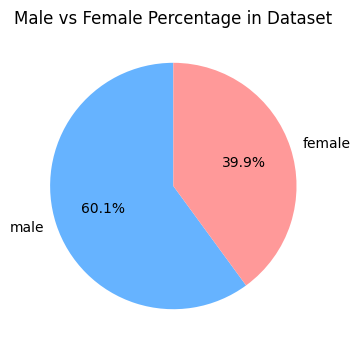

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming it has been cleaned)
df = pd.read_csv('cleaned_dataset.csv')

# Step 1: Count the number of males and females
gender_counts = df['Gender'].value_counts()

# Step 2: Calculate percentages
gender_percentages = (gender_counts / len(df)) * 100

# Step 3: Plot a pie chart for male and female percentages
plt.figure(figsize=(4, 4))
plt.pie(gender_percentages, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
plt.title('Male vs Female Percentage in Dataset')
plt.show()



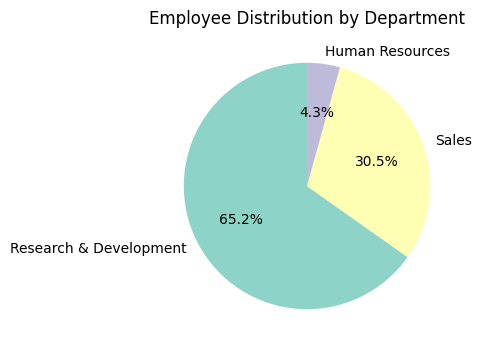

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming it has been cleaned)
df = pd.read_csv('cleaned_dataset.csv')

# Step 1: Count the number of employees in each department
department_counts = df['Department'].value_counts()

# Step 2: Calculate percentages
department_percentages = (department_counts / len(df)) * 100

# Step 3: Plot a pie chart for department-wise employee percentages
plt.figure(figsize=(4, 4))
plt.pie(department_percentages, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Employee Distribution by Department')
plt.show()



In [33]:
import pandas as pd

# Load your dataset (assuming it has been cleaned)
df = pd.read_csv('cleaned_dataset.csv')

# Calculate the average age
average_age = df['Age'].mean()

# Print the result
print(f"The average age of employees is: {average_age:.2f} years")


The average age of employees is: 36.87 years


In [35]:
import pandas as pd

# Load your dataset (assuming it has been cleaned)
df = pd.read_csv('cleaned_dataset.csv')

# Calculate total salary for each department
# Assuming the salary is represented by the 'MonthlyIncome' column
total_salary_by_department = df.groupby('Department')['Monthly_Income'].sum().reset_index()

# Rename the columns for clarity
total_salary_by_department.rename(columns={'Monthly_Income': 'TotalSalary'}, inplace=True)

# Print the result
print(total_salary_by_department)


               Department  TotalSalary
0         Human Resources       412824
1  Research & Development      5862768
2                   Sales      3051783
